17. Aplique o algoritmo implementado na questão 16 no conjunto de
dados consumo_cerveja.csv usando as mesmas features para
treinamento.

a. Compare os resultados que você obteve com os resultados
obtidos através da Scikit Learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# importando dados
df = pd.read_csv('Consumo_cerveja.csv', sep=';') 

In [3]:
# verificando as primeiras linhas
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [4]:
df = df.rename(columns={'Temperatura Media (C)':'meanTemp','Temperatura Minima (C)':'minTemp','Temperatura Maxima (C)':'maxTemp',
                       'Precipitacao (mm)':'precip','Final de Semana':'weekend','Consumo de cerveja (litros)':'consumo'})
df.head()

,Data,meanTemp,minTemp,maxTemp,precip,weekend,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


In [5]:
# dropando coluna Data para normalizar demais valores
data=df.drop('Data', axis=1)
data.columns

Index(['meanTemp', 'minTemp', 'maxTemp', 'precip', 'weekend', 'consumo'], dtype='object')

In [6]:
# verificando nulos
data.isnull().sum()

meanTemp    0
minTemp     0
maxTemp     0
precip      0
weekend     0
consumo     0
dtype: int64

In [7]:
# estatisticas dos dados
data.describe()

,meanTemp,minTemp,maxTemp,precip,weekend,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [8]:
# normalizacao dos dados
data = (data - data.mean())/data.std()
data.head()

,meanTemp,minTemp,maxTemp,precip,weekend,consumo
0,1.909886,2.278205,1.363909,-0.418487,-0.630377,0.013556
1,1.821839,2.490506,1.595532,-0.418487,-0.630377,0.811666
2,1.130038,1.747455,0.761690,-0.418487,1.582005,1.230384
3,0.865896,1.429004,0.460580,-0.321852,1.582005,0.999657
4,0.815584,1.252087,0.391093,-0.418487,-0.630377,0.795299


In [9]:
# funcao de custo
def cost_function(X, y, theta):
    cost = np.power(((X @ theta.T)-y),2)
    return np.sum(cost)/(2 * len(X))

#gradiente descente multi
def gradient_descent_multi(X, y, theta, alpha, num_iter):
    cost = np.zeros(num_iter)
    for i in range(num_iter):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        cost[i] = cost_function(X, y, theta)
    return theta, cost

In [10]:
data.columns

Index(['meanTemp', 'minTemp', 'maxTemp', 'precip', 'weekend', 'consumo'], dtype='object')

In [11]:
# carregando matrizes 
# preparando matrix X com dados das 5 variáveis independentes:
# Temperatura Media (C);Temperatura Minima (C);Temperatura Maxima (C);Precipitacao (mm);Final de Semana
X = data.iloc[:,0:5]

# preenchendo com 1 a primeira coluna de X
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

# carregando y com  Consumo de cerveja e convertendo para numpy.ndarray
y = data.iloc[:,5:6].values

# carregando theta com valor iniciar de zeros
theta = np.zeros([1,6])

# hiperparâmetros
iterations = 1500
alpha = 0.01

In [12]:
split_test_size = 0.30

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)

In [14]:
# custo treinamento
custo = cost_function(X_train, y_train, theta)
custo

0.46686911272082926

In [15]:
# executando funcao com dados de treinamento
theta_lr, custo_h = gradient_descent_multi(X_train, y_train, theta, alpha, iterations)
theta_lr

array([[ 0.00078027,  0.23282791, -0.09413257,  0.50259618, -0.15211571,
         0.54822234]])

In [16]:
Yfit = X_train @ theta_lr.T
Yfit.shape

(255, 1)

In [17]:
mse = mean_squared_error(Yfit,y_train)
mse

0.27340364858326993

In [18]:
custo_test = cost_function(X_test, y_test, theta_lr)
custo_test

0.14589297149127073

Text(0.5, 1.0, 'Erro x Iteracoes')

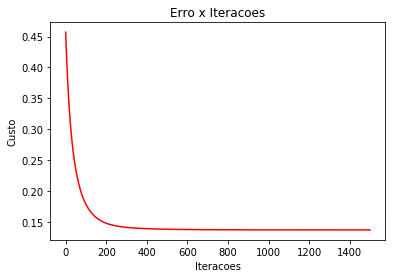

In [19]:
# grafico qtd iteracoes x custo
fig, ax = plt.subplots()  
ax.plot(np.arange(iterations), custo_h, 'r')  
ax.set_xlabel('Iteracoes')  
ax.set_ylabel('Custo')  
ax.set_title('Erro x Iteracoes')  

In [20]:
theta_lr 

array([[ 0.00078027,  0.23282791, -0.09413257,  0.50259618, -0.15211571,
         0.54822234]])

In [21]:
Yfit = X_test @ theta_lr.T
Yfit.shape

(110, 1)

In [22]:
y_test.shape

(110, 1)

In [23]:
mse = mean_squared_error(Yfit,y_test)
mse

0.29178594298254146